<a href="https://colab.research.google.com/github/Audraymessa/Progetto_auto/blob/main/Progetto_Auto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🟦 BLOCCO 1: Caricamento e Pulizia Dati
 Carica i dati, cancella la colonna dei Nomi (che creava problemi) e trasforma il testo in numeri.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carichiamo il file
try:
    df = pd.read_csv("car data.csv")
    print("✅ Dataset caricato!")
except:
    print("❌ ERRORE: Hai dimenticato di trascinare il file 'car data.csv' a sinistra!")

# 2. Pulizia Dati (Data Cleaning)
# Rimuoviamo il nome dell'auto (troppe varianti)
if 'Car_Name' in df.columns:
    df.drop('Car_Name', axis=1, inplace=True)

# 3. Trasformazione testo -> numeri (One-Hot Encoding)
df_final = pd.get_dummies(df, drop_first=True)

print(f"✅ Dati puliti e trasformati! Abbiamo {df_final.shape[1]} colonne pronte per l'AI.")
display(df_final.head())

✅ Dataset caricato!
✅ Dati puliti e trasformati! Abbiamo 9 colonne pronte per l'AI.


,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,False,True,False,True
1,2013,4.75,9.54,43000,0,True,False,False,True
2,2017,7.25,9.85,6900,0,False,True,False,True
3,2011,2.85,4.15,5200,0,False,True,False,True
4,2014,4.60,6.87,42450,0,True,False,False,True


🟦 BLOCCO 2: Grafici (Analisi Esplorativa)
Analisi del mercato

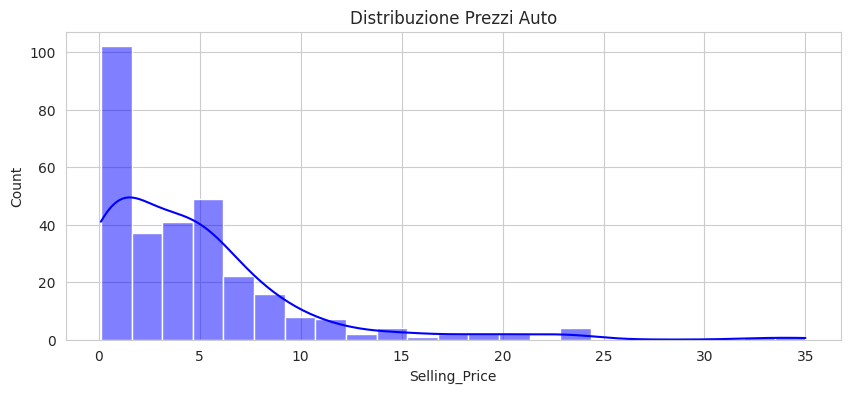

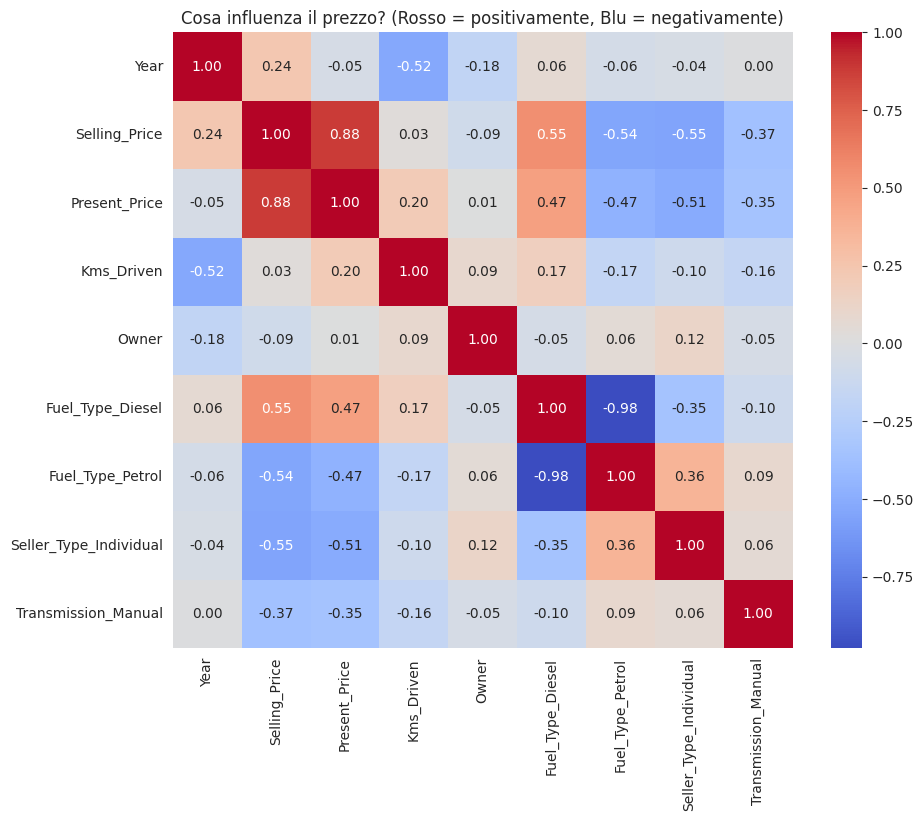

In [2]:
sns.set_style("whitegrid")

# Grafico 1: Distribuzione prezzi
plt.figure(figsize=(10, 4))
sns.histplot(df_final['Selling_Price'], kde=True, color='blue')
plt.title('Distribuzione Prezzi Auto')
plt.show()

# Grafico 2: Correlazioni (Mappa di Calore)
plt.figure(figsize=(10, 8))
sns.heatmap(df_final.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Cosa influenza il prezzo? (Rosso = positivamente, Blu = negativamente)')
plt.show()

🟦 BLOCCO 3: Intelligenza Artificiale (Scikit-Learn + TensorFlow)

Questo è il cuore del progetto: il confronto tra Regressione classica e Rete Neurale.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
------------------------------
📊 VOTO Regressione Lineare: 0.8490
🧠 VOTO Rete Neurale (TensorFlow): 0.9580
------------------------------


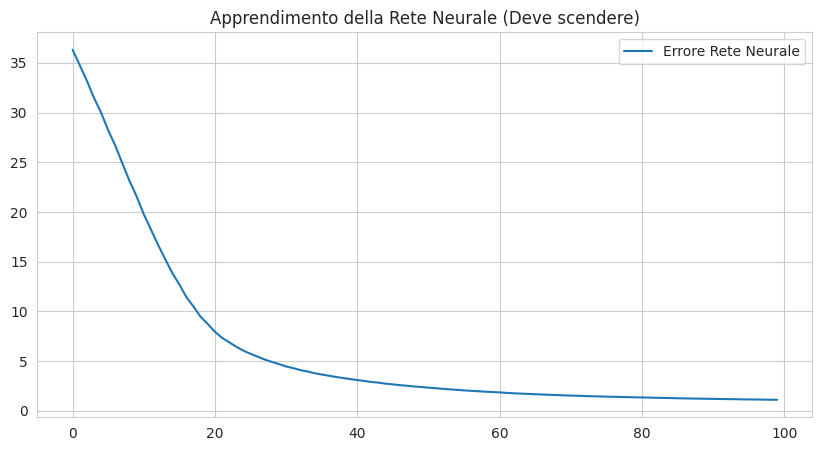

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# --- PREPARAZIONE ---
X = df_final.drop('Selling_Price', axis=1)
y = df_final['Selling_Price']

# Divisione Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizzazione (Mettiamo i numeri sulla stessa scala)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- MODELLO 1: REGRESSIONE LINEARE (Classico) ---
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)
score_lin = r2_score(y_test, y_pred_lin)

# --- MODELLO 2: RETE NEURALE (TensorFlow) ---
model_ann = Sequential([
    Dense(12, activation='relu', input_shape=(X_train_scaled.shape[1],)), # Input
    Dense(8, activation='relu'), # Hidden Layer
    Dense(1) # Output (Prezzo)
])
model_ann.compile(optimizer='adam', loss='mean_squared_error')
# Addestramento silenzioso (verbose=0)
history = model_ann.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, verbose=0)

y_pred_ann = model_ann.predict(X_test_scaled)
score_ann = r2_score(y_test, y_pred_ann)

# --- RISULTATI FINALI ---
print("-" * 30)
print(f"📊 VOTO Regressione Lineare: {score_lin:.4f}")
print(f"🧠 VOTO Rete Neurale (TensorFlow): {score_ann:.4f}")
print("-" * 30)

# Grafico confronto
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Errore Rete Neurale')
plt.title('Apprendimento della Rete Neurale (Deve scendere)')
plt.legend()
plt.show()